In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
stock = pd.read_csv("data/stock_prices.csv")
stock.head()

,date,ticker,close_price
0,2023-01-01,AAPL,210.82
1,2023-01-02,AAPL,214.18
2,2023-01-03,AAPL,216.24
3,2023-01-04,AAPL,217.10
4,2023-01-05,AAPL,218.96


In [6]:
stock.set_index("date", inplace=True)

In [7]:
stock.describe(include='all')

,ticker,close_price
count,5000,5000.000000
unique,5,NaN
top,AAPL,NaN
freq,1000,NaN
mean,NaN,167.614466
std,NaN,47.012464
min,NaN,83.780000
25%,NaN,126.877500
50%,NaN,159.975000
75%,NaN,210.585000


In [8]:
# Filter AAPL stock only
AAPL = stock[stock['ticker'] == 'AAPL']
AAPL.head()

,ticker,close_price
date,,
2023-01-01,AAPL,210.82
2023-01-02,AAPL,214.18
2023-01-03,AAPL,216.24
2023-01-04,AAPL,217.10
2023-01-05,AAPL,218.96


In [12]:
# Compute rolling metrics
AAPL['7d_rolling_avg'] = AAPL['close_price'].rolling(window=7, min_periods=1).mean().fillna(method='bfill')
AAPL['30d_rolling_avg'] = AAPL['close_price'].rolling(window=30, min_periods=1).mean().fillna(method='bfill')
AAPL.head(10)

/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/1823665689.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  AAPL['7d_rolling_avg'] = AAPL['close_price'].rolling(window=7, min_periods=1).mean().fillna(method='bfill')
/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/1823665689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['7d_rolling_avg'] = AAPL['close_price'].rolling(window=7, min_periods=1).mean().fillna(method='bfill')
/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/1823665689.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or o

,ticker,close_price,7d_rolling_avg,30d_rolling_avg
date,,,,
2023-01-01,AAPL,210.82,210.820000,210.820000
2023-01-02,AAPL,214.18,212.500000,212.500000
2023-01-03,AAPL,216.24,213.746667,213.746667
2023-01-04,AAPL,217.10,214.585000,214.585000
2023-01-05,AAPL,218.96,215.460000,215.460000
2023-01-06,AAPL,216.87,215.695000,215.695000
2023-01-07,AAPL,213.12,215.327143,215.327143
2023-01-08,AAPL,210.00,215.210000,214.661250
2023-01-09,AAPL,210.58,214.695714,214.207778


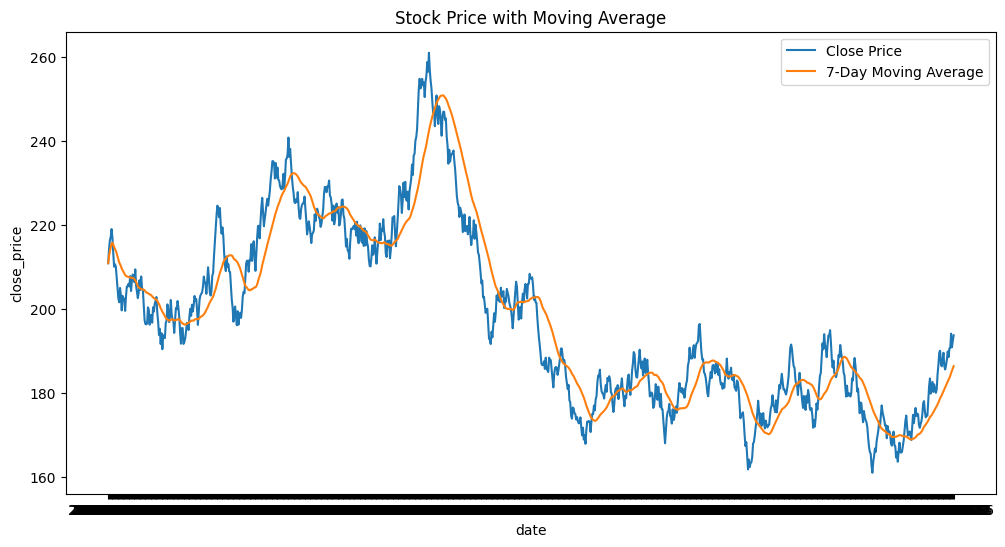

In [14]:
# Plot the rolling averages alongside the daily closing price using matplotlib or seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=AAPL, x=AAPL.index, y='close_price', label='Close Price')
sns.lineplot(data=AAPL, x=AAPL.index, y='30d_rolling_avg', label='7-Day Moving Average')
plt.title('Stock Price with Moving Average')
plt.legend()
plt.show() 

In [15]:
# Calculate percent change
AAPL['percent_change'] = (AAPL['close_price'] - AAPL['close_price'].shift(1)) / AAPL['close_price'].shift(1)
AAPL.head(10)

/var/folders/m7/9_frjjyx2mlb_s51nv_8v3rm0000gn/T/ipykernel_62795/3102978367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['percent_change'] = (AAPL['close_price'] - AAPL['close_price'].shift(1)) / AAPL['close_price'].shift(1)


,ticker,close_price,7d_rolling_avg,30d_rolling_avg,percent_change
date,,,,,
2023-01-01,AAPL,210.82,210.820000,210.820000,NaN
2023-01-02,AAPL,214.18,212.500000,212.500000,0.015938
2023-01-03,AAPL,216.24,213.746667,213.746667,0.009618
2023-01-04,AAPL,217.10,214.585000,214.585000,0.003977
2023-01-05,AAPL,218.96,215.460000,215.460000,0.008567
2023-01-06,AAPL,216.87,215.695000,215.695000,-0.009545
2023-01-07,AAPL,213.12,215.327143,215.327143,-0.017291
2023-01-08,AAPL,210.00,215.210000,214.661250,-0.014640
2023-01-09,AAPL,210.58,214.695714,214.207778,0.002762


In [ ]:
# Time Series Modeling